# TAL aplicado al análisis del discurso de los medios de prensa 📰🤓🔥


Random forest es un algoritmo de aprendizaje supervisado. Se puede utilizar tanto para clasificación como para regresión. También es el algoritmo más flexible y fácil de usar. Random forest está compuesto por árboles. Se dice que cuantos más árboles tiene, más robusto es un bosque. Random forest crea árboles de decisión sobre muestras de datos seleccionadas al azar, obtienen predicciones de cada árbol y seleccionan la mejor solución mediante votación. También proporciona un indicador bastante bueno de la importancia de la función.



### índex

1. [Importación del dataset](a)
2. [Preprocesamiento y representación vectorial](b)
3. [Entrenamiento del modelo de clasificación](b)
4. [Evaluación del modelo de clasificación](c)

    4.4 [Matriz de confusión](d)


In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#NLP
import spacy
nlp = spacy.load("es_core_news_sm")
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
import string

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Regresion Logística

# Data manipulation
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from tqdm import tqdm


### 1. Importación del dataset


In [3]:
train = pd.read_csv("CNN_train.csv")
test = pd.read_csv("CNN_test.csv")
display(train.head(5), valid.head(5), test.head(5))

,text,label
0,Francia superó este martes el umbral de los 42...,catástrofes y accidentes
1,"Carmen Balcazar, madre de Luis Morales Balcaza...",catástrofes y accidentes
2,La pandemia de nuevo coronavirus ha provocado ...,catástrofes y accidentes
3,Este jueves se registró un temblor magnitud 7....,catástrofes y accidentes
4,Fue durante el rodaje de la segunda temporada ...,catástrofes y accidentes


,text,label
0,La Fiscalía de Arica y detectives de la Brigad...,"crimen, delitos y justicia"
1,Miles de turistas que viajaron al sur de Chile...,ecología y planeta
2,Crédito: @dw_espanolLas autoridades decidieron...,ecología y planeta
3,Luego de que la Unidad de Investigación de Rad...,"crimen, delitos y justicia"
4,golagol('/especiales/2020/deportes/gol-gol/Pri...,deporte


,text,label
0,El Tribunal Constitucional (TC) resolvió este ...,política y conflictos
1,El 25° Juzgado Civil de Santiago condenó al fi...,catástrofes y accidentes
2,Desde su creación en la ciudad de Valparaíso e...,cultura y arte
3,Un escándalo. El volante marfileño Yaya Touré ...,cultura y arte
4,Durante la versión más reciente de “War Table”...,política y conflictos


In [4]:
train['label'].value_counts()

economía                      3927
catástrofes y accidentes      3927
ciencia y tecnología          3927
cultura y arte                3927
política y conflictos         3927
deporte                       3927
mundo                         3927
ecología y planeta            3927
salud                         3927
crimen, delitos y justicia    3927
Name: label, dtype: int64

In [5]:
X_train = train['text']
y_train = train['label']
X_test = test['text']
y_test = test['label']

### 2. Preprocesamiento y representación vectorial

In [6]:
# Create our list of punctuation marks
punctuations = [".",",","!","?", "#","&"]

# Create our list of stopwords
stop_words=[""]

# Load English tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lower_ for word in mytokens]
        
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [7]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fe2e92a81f0>)

In [8]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

### 3. Entrenamiento del modelo de clasificación

In [9]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=0)

model3 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelRF)])

# model generation
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fe2e92a81f0>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])


### 4. Evaluación del modelo de clasificación


In [10]:
# Predicting with a test dataset
predicted = model3.predict(X_test)
print(predicted)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, 
                                           average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, 
                                           average='micro'))

['política y conflictos' 'catástrofes y accidentes' 'cultura y arte' ...
 'mundo' 'salud' 'crimen, delitos y justicia']
Logistic Regression Accuracy: 0.6887743145066791
Logistic Regression Precision: 0.6887743145066791
Logistic Regression Recall: 0.6887743145066791



### 4.1. Matriz de confusión


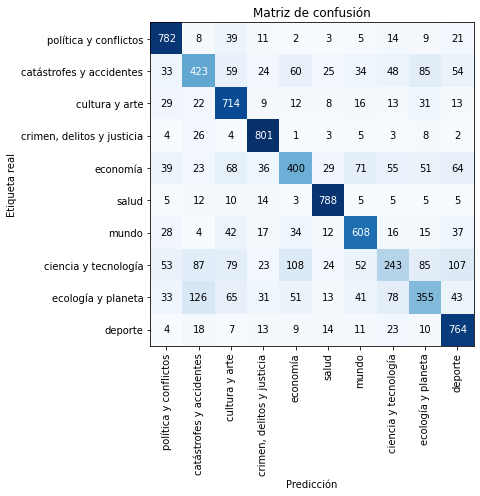

                            precision    recall  f1-score   support

  catástrofes y accidentes      0.774     0.875     0.821       894
      ciencia y tecnología      0.565     0.501     0.531       845
crimen, delitos y justicia      0.657     0.824     0.731       867
            cultura y arte      0.818     0.935     0.873       857
                   deporte      0.588     0.478     0.528       836
        ecología y planeta      0.857     0.925     0.890       852
                  economía      0.717     0.748     0.732       813
                     mundo      0.488     0.282     0.358       861
     política y conflictos      0.543     0.425     0.477       836
                     salud      0.688     0.875     0.771       873

                  accuracy                          0.689      8534
                 macro avg      0.670     0.687     0.671      8534
              weighted avg      0.670     0.689     0.672      8534



In [14]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation='vertical')
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=predicted)
plot_confusion_matrix(cm, labels=list(test['label'].unique()))
print(classification_report(y_test, predicted, digits=3))